<a href="https://colab.research.google.com/github/arjundussa65/Thesis-2020/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

This file contains the code for data exploration steps performed. 

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objs as go
import matplotlib.dates as mdates 

In [ ]:
#Load file into Colab
df=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/covid_labelled.csv", encoding='utf-8')

In [ ]:
df.head()

,User,Text,Date,Favorites,Retweets,Mentions,HashTags,neg,neu,pos,vader_polarity,Textblob_Polarity,Num_Sentiment
0,KendallHarmon6,stat news speed critical spreads in officials ...,2020-03-01 23:59:17+00:00,0,0,NaN,#coronavirus #USA #economy #covid19 #globalisa...,0.187,0.813,0.000,-0.3182,0.000000,-1
1,Switzercomau,first australian now passed away from coronavi...,2020-03-01 23:45:00+00:00,0,0,NaN,#australia #ausnews #breakingnews #worldnews #...,0.000,1.000,0.000,0.0000,0.250000,0
2,TushK11,new york magazine new coronavirus cases confir...,2020-03-01 23:41:02+00:00,0,0,@googlenews,#coronavirususa #StockMarket #COVID19 #stocks,0.112,0.888,0.000,-0.3412,0.080682,-1
3,StockDaddy0,still not friday lows but we moving let s see ...,2020-03-01 23:39:19+00:00,0,0,NaN,#DoctorWho #COVID #March1st #SundayThoughts #C...,0.140,0.792,0.068,-0.3300,0.000000,-1
4,murtdoc,things look bleak oil barrel seems easy target...,2020-03-01 23:38:43+00:00,0,0,NaN,#Oil #stock #COVID19 #financialcrush2020,0.131,0.707,0.162,-0.0258,-0.088889,0


In [ ]:
#Drop columns not needed
df.drop(columns=['neg','neu','pos','Textblob_Polarity'],inplace=True,axis=1)

In [ ]:
df.head()

,User,Text,Date,Favorites,Retweets,Mentions,HashTags,vader_polarity,Num_Sentiment
0,KendallHarmon6,stat news speed critical spreads in officials ...,2020-03-01 23:59:17+00:00,0,0,NaN,#coronavirus #USA #economy #covid19 #globalisa...,-0.3182,-1
1,Switzercomau,first australian now passed away from coronavi...,2020-03-01 23:45:00+00:00,0,0,NaN,#australia #ausnews #breakingnews #worldnews #...,0.0000,0
2,TushK11,new york magazine new coronavirus cases confir...,2020-03-01 23:41:02+00:00,0,0,@googlenews,#coronavirususa #StockMarket #COVID19 #stocks,-0.3412,-1
3,StockDaddy0,still not friday lows but we moving let s see ...,2020-03-01 23:39:19+00:00,0,0,NaN,#DoctorWho #COVID #March1st #SundayThoughts #C...,-0.3300,-1
4,murtdoc,things look bleak oil barrel seems easy target...,2020-03-01 23:38:43+00:00,0,0,NaN,#Oil #stock #COVID19 #financialcrush2020,-0.0258,0


In [ ]:
df.tail()

,User,Text,Date,Favorites,Retweets,Mentions,HashTags,vader_polarity,Num_Sentiment
19789,grumpysteward,will likely taking advantage cheaper stock prices,2020-02-28 23:55:05+00:00,0,0,NaN,#grumpystew #covid #travelnews #stockprices,0.2500,1
19790,stock_fairy,keep falling how confident will you about and ...,2020-02-28 23:54:39+00:00,0,0,NaN,#stockmarkets #vaccine #COVID,0.3818,1
19791,BusTrav,covid cancels more than flights from and withi...,2020-02-28 23:35:28+00:00,0,0,NaN,#businesstravel #travel,-0.2263,-1
19792,BusTrav,covid cases jump in iran italy toll rises live...,2020-02-29 23:34:33+00:00,0,0,NaN,#businesstravel #travel,0.0000,0
19793,astuteinvesting,breaking goldman sachs predicts bigger covid h...,2020-02-29 23:18:54+00:00,0,0,NaN,#finance,-0.2960,-1


In [ ]:
df.shape

(19794, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19794 entries, 0 to 19793
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            19794 non-null  object 
 1   Text            19794 non-null  object 
 2   Date            19794 non-null  object 
 3   Favorites       19794 non-null  int64  
 4   Retweets        19794 non-null  int64  
 5   Mentions        4319 non-null   object 
 6   HashTags        19782 non-null  object 
 7   vader_polarity  19794 non-null  float64
 8   Num_Sentiment   19794 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [ ]:
#Checking null values in tweet text column
df['Text'].isnull().sum() # Display Null Tweet_text values count

0

In [ ]:
#Creating seperate columns for date and time from timestamp value
df['Tweet_Date'] = pd.to_datetime(df['Date']).dt.date
df['Tweet_Time'] = pd.to_datetime(df['Date']).dt.time

In [ ]:
#Drop date column
df.drop(columns=['Date'],axis=1,inplace=True)

In [ ]:
df.head()

,User,Text,Favorites,Retweets,Mentions,HashTags,vader_polarity,Num_Sentiment,Tweet_Date,Tweet_Time
0,KendallHarmon6,stat news speed critical spreads in officials ...,0,0,NaN,#coronavirus #USA #economy #covid19 #globalisa...,-0.3182,-1,2020-03-01,23:59:17
1,Switzercomau,first australian now passed away from coronavi...,0,0,NaN,#australia #ausnews #breakingnews #worldnews #...,0.0000,0,2020-03-01,23:45:00
2,TushK11,new york magazine new coronavirus cases confir...,0,0,@googlenews,#coronavirususa #StockMarket #COVID19 #stocks,-0.3412,-1,2020-03-01,23:41:02
3,StockDaddy0,still not friday lows but we moving let s see ...,0,0,NaN,#DoctorWho #COVID #March1st #SundayThoughts #C...,-0.3300,-1,2020-03-01,23:39:19
4,murtdoc,things look bleak oil barrel seems easy target...,0,0,NaN,#Oil #stock #COVID19 #financialcrush2020,-0.0258,0,2020-03-01,23:38:43


## Barplot of Number of tweets vs Date

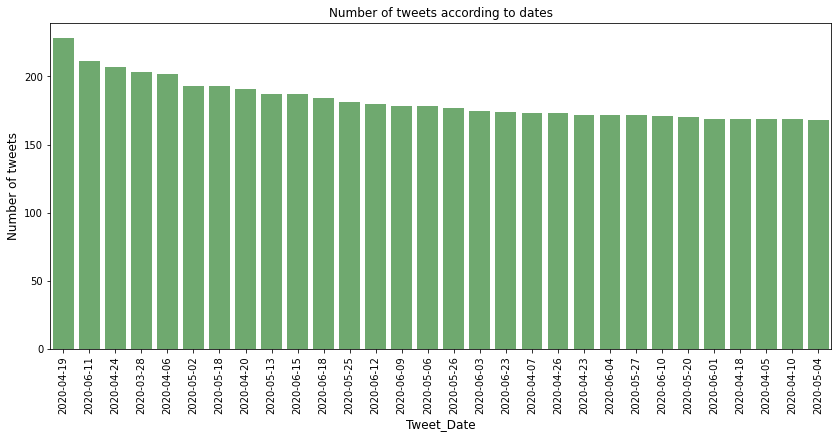

In [ ]:
#Plot number of tweets vs dates where maximum tweets registered. Top 30 are taken

date_cnt = df['Tweet_Date'].value_counts().sort_values(ascending=False).head(30)         # get count values as per Created Date column values 
#date_cnt = date_cnt.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(date_cnt.index, date_cnt.values, alpha=0.6, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Tweet_Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")
plt.show()

## Doughnut Chart of Day of the week vs Tweet percentage

In [ ]:
#Extract day of the week using tweet date

df['Tweet_Date'] = pd.to_datetime(df['Tweet_Date'], errors='coerce')
df['tweeted_day_of_week'] = df['Tweet_Date'].dt.day_name()   # Get Day of week from Created Date column

In [ ]:
df.head()

,User,Text,Favorites,Retweets,Mentions,HashTags,vader_polarity,Num_Sentiment,Tweet_Date,Tweet_Time,tweeted_day_of_week
0,KendallHarmon6,stat news speed critical spreads in officials ...,0,0,NaN,#coronavirus #USA #economy #covid19 #globalisa...,-0.3182,-1,2020-03-01,23:59:17,Sunday
1,Switzercomau,first australian now passed away from coronavi...,0,0,NaN,#australia #ausnews #breakingnews #worldnews #...,0.0000,0,2020-03-01,23:45:00,Sunday
2,TushK11,new york magazine new coronavirus cases confir...,0,0,@googlenews,#coronavirususa #StockMarket #COVID19 #stocks,-0.3412,-1,2020-03-01,23:41:02,Sunday
3,StockDaddy0,still not friday lows but we moving let s see ...,0,0,NaN,#DoctorWho #COVID #March1st #SundayThoughts #C...,-0.3300,-1,2020-03-01,23:39:19,Sunday
4,murtdoc,things look bleak oil barrel seems easy target...,0,0,NaN,#Oil #stock #COVID19 #financialcrush2020,-0.0258,0,2020-03-01,23:38:43,Sunday


In [ ]:
#Plot Doughnut chart for tweet percentage and day of the week   

cnt_ = df['tweeted_day_of_week'].value_counts()                         # Get week day value count to plot Donut-Chart for tweets
cnt_ = cnt_.sort_index() 
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Number of tweets per day",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of tweets per days of the week",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Percentage of Tweets according to days of the week",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
cnt_

Friday       2853
Monday       3051
Saturday     2673
Sunday       2703
Thursday     2876
Tuesday      2792
Wednesday    2846
Name: tweeted_day_of_week, dtype: int64

## Sentiment variation plot with Vader polarity for the entire tweet period considered

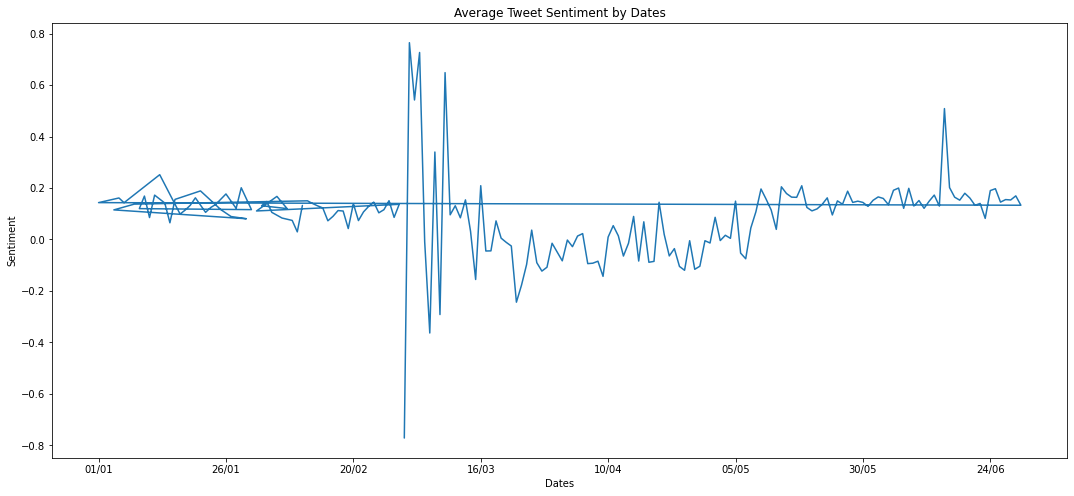

In [ ]:
#Sentiment variation by dates for the entire period

#df['Tweet_Date']= df['Tweet_Date'].dt.strftime('%Y-%m-%d')

date = df['Tweet_Date'].map(lambda date: mdates.datestr2num(date)).unique()
avg_polarity = df[['vader_polarity']].groupby(by=df['Tweet_Date']).mean()

plt.figure(figsize=(40,8))
plt.subplot(1, 2, 1)
plt.title('Average Tweet Sentiment by Dates')
plt.xlabel('Dates')
plt.ylabel('Sentiment')
sns.set(palette='Set1',color_codes=True)
plt.plot(date,avg_polarity)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

## Retweet count vs Polarity 

Text(0.5, 1.0, 'Retweets Vs Polarity (USA)')

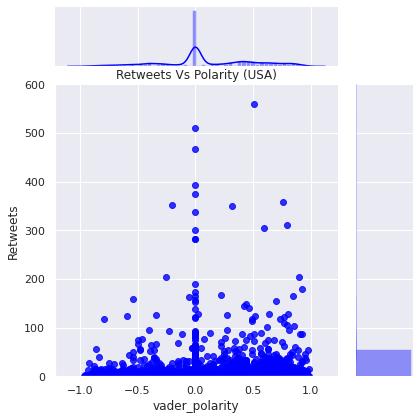

In [ ]:
#Retweet_Count vs Sentiment polarity 
sns.set(style="darkgrid")

sns.jointplot(y='Retweets' , x='vader_polarity',
                data=df, kind='reg', color='blue',
                 ylim=(0,600),space=0.3,ratio=4)
plt.title('Retweets Vs Polarity')


## Wordcloud representation for All Tweets

In [ ]:
# Plot wordCloud for entire Tweet_Text column 
wordcloud__ = WordCloud(
                          background_color='white',
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

## Worcloud representation for Positive Tweets

In [ ]:
pos_tweets = df[df.vader_polarity > 0.20 ]     # extract positive tweets from tweet_df dataframe object.

In [ ]:
# Plot wordCloud for postive tweets 
wordcloud__ = WordCloud(
                          background_color='white',
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(pos_tweets['Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

## Wordcloud representation for Negative tweets

In [ ]:
neg_tweets = df[df.vader_polarity < -0.2 ]               # extract Negative tweets from tweet_df dataframe object.

In [ ]:
# Plot wordCloud for Negative tweets
wordcloud__ = WordCloud(
                          background_color='white',
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(neg_tweets['Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

## Wordcloud representation for Neutral Tweets

In [ ]:
netural_tweets = df[(df.vader_polarity >= -0.2) & (df.vader_polarity <= 0.2)]  # extract Neutral tweets from tweet_df dataframe object.

In [ ]:
# Plot wordCloud for neutral tweet
wordcloud__ = WordCloud(
                          background_color='white',
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(netural_tweets['Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

## Creating Target labels from Polarity score

In [ ]:
import numpy as np
cut = pd.cut(
    df['vader_polarity'],
    [-np.inf, -.2, .2, np.inf],
    labels=['negative', 'neutral', 'positive']      # create new column sentiment on the polarity score
)
df['sentiment'] = cut.values
df[['sentiment','vader_polarity']][:20]

,sentiment,vader_polarity
0,negative,-0.3182
1,neutral,0.0000
2,negative,-0.3412
3,negative,-0.3300
4,neutral,-0.0258
5,neutral,0.0000
6,negative,-0.3400
7,positive,0.2500
8,neutral,0.1531
9,neutral,0.0000


In [ ]:
#Group wise count for each sentiment
temp = df.groupby('sentiment').count()['Text'].reset_index().sort_values(by='Text',ascending=False)  # get the count of each sentiment
temp.style.background_gradient(cmap='Purples')

,sentiment,Text
1,neutral,8428
2,positive,7579
0,negative,3787


## Barplot and Funnel chart for Group by count of each sentiment category

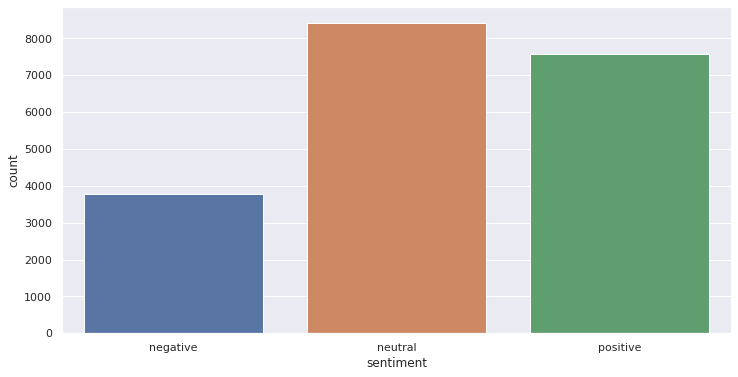

In [ ]:
#Barplot of categories
plt.figure(figsize=(12,6))                   #Barplot for sentiment count across input dataset
sns.countplot(x='sentiment',data=df)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.Text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
df.head()

,User,Text,Favorites,Retweets,Mentions,HashTags,vader_polarity,Num_Sentiment,Tweet_Date,Tweet_Time,tweeted_day_of_week,sentiment
0,KendallHarmon6,stat news speed critical spreads in officials ...,0,0,NaN,#coronavirus #USA #economy #covid19 #globalisa...,-0.3182,-1,2020-03-01,23:59:17,Sunday,negative
1,Switzercomau,first australian now passed away from coronavi...,0,0,NaN,#australia #ausnews #breakingnews #worldnews #...,0.0000,0,2020-03-01,23:45:00,Sunday,neutral
2,TushK11,new york magazine new coronavirus cases confir...,0,0,@googlenews,#coronavirususa #StockMarket #COVID19 #stocks,-0.3412,-1,2020-03-01,23:41:02,Sunday,negative
3,StockDaddy0,still not friday lows but we moving let s see ...,0,0,NaN,#DoctorWho #COVID #March1st #SundayThoughts #C...,-0.3300,-1,2020-03-01,23:39:19,Sunday,negative
4,murtdoc,things look bleak oil barrel seems easy target...,0,0,NaN,#Oil #stock #COVID19 #financialcrush2020,-0.0258,0,2020-03-01,23:38:43,Sunday,neutral
